In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as image
import glob
import os

In [2]:
images_fp = './Pet_Breeds'

In [3]:
image_names = [os.path.basename(file) for file in glob.glob(os.path.join(images_fp, '*.jpg'))]

In [4]:
image_names

['abyssinian_1.jpg',
 'abyssinian_10.jpg',
 'abyssinian_100.jpg',
 'abyssinian_101.jpg',
 'abyssinian_102.jpg',
 'abyssinian_103.jpg',
 'abyssinian_104.jpg',
 'abyssinian_105.jpg',
 'abyssinian_106.jpg',
 'abyssinian_107.jpg',
 'abyssinian_108.jpg',
 'abyssinian_11.jpg',
 'abyssinian_110.jpg',
 'abyssinian_111.jpg',
 'abyssinian_112.jpg',
 'abyssinian_113.jpg',
 'abyssinian_114.jpg',
 'abyssinian_115.jpg',
 'abyssinian_116.jpg',
 'abyssinian_117.jpg',
 'abyssinian_118.jpg',
 'abyssinian_119.jpg',
 'abyssinian_12.jpg',
 'abyssinian_120.jpg',
 'abyssinian_121.jpg',
 'abyssinian_122.jpg',
 'abyssinian_123.jpg',
 'abyssinian_124.jpg',
 'abyssinian_125.jpg',
 'abyssinian_126.jpg',
 'abyssinian_127.jpg',
 'abyssinian_128.jpg',
 'abyssinian_129.jpg',
 'abyssinian_13.jpg',
 'abyssinian_130.jpg',
 'abyssinian_131.jpg',
 'abyssinian_132.jpg',
 'abyssinian_133.jpg',
 'abyssinian_134.jpg',
 'abyssinian_135.jpg',
 'abyssinian_136.jpg',
 'abyssinian_137.jpg',
 'abyssinian_138.jpg',
 'abyssinian_139.

In [5]:
labels = [' '.join(name.split('_')[:-1:])for name in image_names]

In [6]:
labels

['abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssinian',
 'abyssini

In [7]:
def label_encode(label):
    if label == "abyssinian": return 0
    elif label == "american shorthair": return 1
    elif label == "beagle": return 2
    elif label == "boxer": return 3
    elif label == "bulldog": return 4
    elif label == "chihuahua": return 5
    elif label == "corgi": return 6
    elif label == "dachshund": return 7
    elif label == "german shepherd": return 8
    elif label == "golden retriever": return 9
    elif label == "husky": return 10
    elif label == "labrador": return 11
    elif label == "maine coon": return 12
    elif label == "mumbai cat": return 13
    elif label == "persian cat": return 14
    elif label == "pomeranian": return 15
    elif label == "pug": return 16
    elif label == "ragdoll cat": return 17
    elif label == "rottwiler": return 18
    elif label == "shiba inu": return 19
    elif label == "siamese cat": return 20
    elif label == "sphynx": return 21
    elif label == "yorkshire terrier": return 22

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [10]:
features = []
labels = []
IMAGE_SIZE = (224, 224)

for name in image_names:
    label = ' '.join(name.split('_')[:-1:])
    label_encoded = label_encode(label)
    if label_encoded != None:
        img = load_img(os.path.join(images_fp, name))
        img = tf.image.resize_with_pad(img_to_array(img, dtype = 'uint8'), *IMAGE_SIZE).numpy().astype('uint8')
        image = np.array(img)
        features.append(image)
        labels.append(label_encoded)

In [11]:
features

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

In [12]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [13]:
features_array = np.array(features)
labels_array = np.array(labels)

In [14]:
labels_one_hot = pd.get_dummies(labels_array)

In [15]:
labels_one_hot

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3760,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3761,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3762,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3763,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [18]:
!pip install -U scikit-learn   

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 621.2 kB/s eta 0:00:14
   -- ------------------------------------- 0.5/8.7 MB 621.2 kB/s eta 0:00:14
   --- ------------------------------------ 0.8/8.7 MB 599.2 kB/s eta 0:00:14
   --- ------------------------------------ 0.8/8.7 MB 599.2 kB/s eta 0:00:14
   --- ------------------------------------ 0.8/8.7 MB 599.2 kB/s eta 0:00:14
   --- ------------------------------------ 0.8/8.7 MB 599.2 kB/s eta 0:00:14
   --- ------------------------------------ 0.8/8.7 MB 599.2 kB/s eta 0:00:14
   ---- ----------------------------------- 1.0/8.7 MB 406.0 kB/s eta 0:00:19
   ---- -----------------------

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# Train - 60% + Val - 20%, Test - 20%
X_train, X_test, y_train, y_test = train_test_split(features_array, labels_one_hot, test_size = 0.2, random_state = 42)

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 1)

In [41]:
from tensorflow.keras import layers, Input, Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as pp_i
from tensorflow.keras.layers import RandomFlip, RandomRotation, Dense, Dropout
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [35]:
data_augumentation = Sequential([RandomFlip("horizontal_and_vertical"), RandomRotation(0.2)])
prediction_layers = Dense(23, activation = "softmax")

In [36]:
resnet_model = ResNet50(include_top = False, pooling = "avg", weights = "imagenet")
resnet_model.trainable = False
preprocess_input = pp_i

In [37]:
# Build model
inputs = Input(shape = (224, 224, 3))
x = data_augumentation(inputs)
x = preprocess_input(x)
x = resnet_model(x, training = False)
x = Dropout(0.2)(x)
outputs = prediction_layers(x)
model = Model(inputs, outputs)

In [42]:
model.compile(optimizer = Adam(), loss = "categorical_crossentropy", metrics = ["accuracy"])

In [43]:
model_history = model.fit(x = X_train, y = y_train, validation_data = (X_val, y_val), epochs = 10)

Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.1857 - loss: 2.9987 - val_accuracy: 0.7703 - val_loss: 0.8868
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.6374 - loss: 1.1978 - val_accuracy: 0.8340 - val_loss: 0.5951
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.7034 - loss: 0.9543 - val_accuracy: 0.8539 - val_loss: 0.5137
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.7458 - loss: 0.8147 - val_accuracy: 0.8459 - val_loss: 0.5231
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.7593 - loss: 0.7411 - val_accuracy: 0.8592 - val_loss: 0.4772
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.8170 - loss: 0.6003 - val_accuracy: 0.8592 - val_loss: 0.4812
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.7924 - loss: 0.6387 - val_accuracy: 0.8725 - val_loss: 0.4261
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.8319 - loss: 0.5210 - val_accuracy: 0.8659 - val_loss:

In [44]:
acc = model_history.history["accuracy"]
val_acc = model_history.history["val_accuracy"]
loss = model_history.history["loss"]
val_loss = model_history.history["val_loss"]

Text(0.5, 1.0, 'Training and Validation Loss')

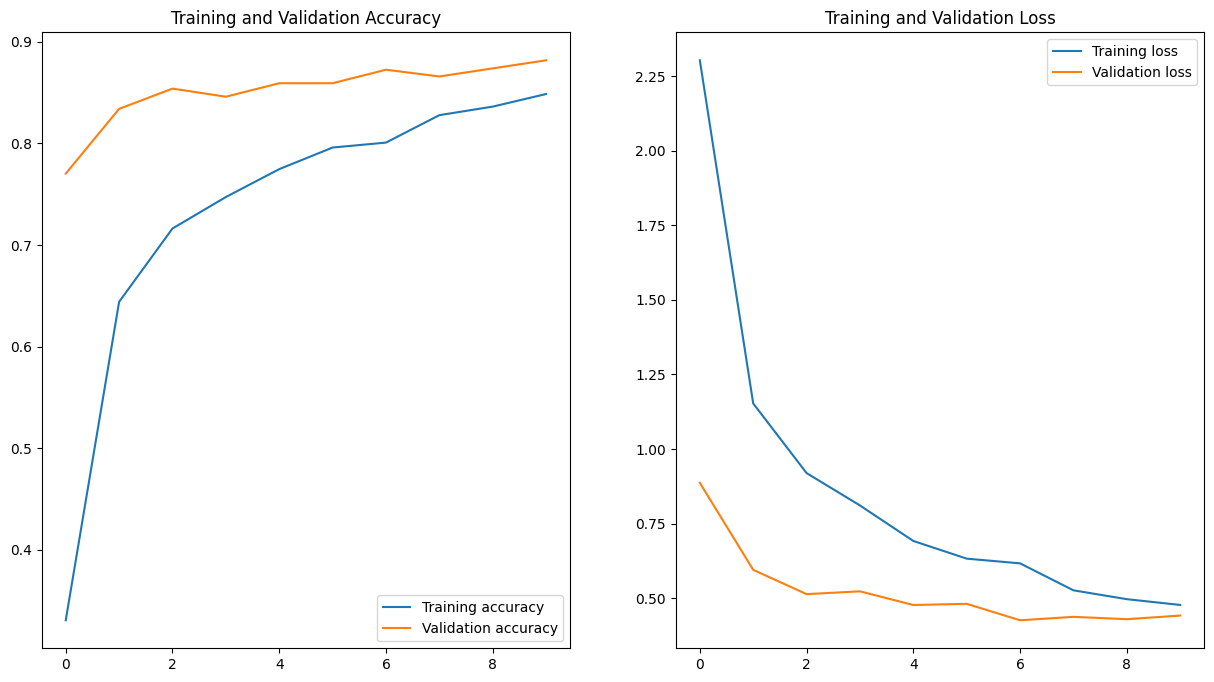

In [47]:
epochs_range = range(10)
plt.figure(figsize = (15, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = "Training accuracy")
plt.plot(epochs_range, val_acc, label = "Validation accuracy")
plt.legend(loc = "lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = "Training loss")
plt.plot(epochs_range, val_loss, label = "Validation loss")
plt.legend(loc = "upper right")
plt.title("Training and Validation Loss")

In [48]:
model.evaluate(X_test, y_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 717ms/step - accuracy: 0.8576 - loss: 0.4703


[0.4746819734573364, 0.863213837146759]

In [49]:
y_pred = model.predict(X_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 815ms/step


In [50]:
y_pred

array([[2.97251489e-07, 1.55652942e-05, 7.24382116e-05, ...,
        6.47506458e-05, 1.37195784e-05, 1.64953883e-06],
       [1.97216286e-05, 2.09363410e-04, 1.58771791e-03, ...,
        1.75363130e-05, 7.91927014e-05, 1.86164561e-03],
       [6.38342362e-06, 5.75777948e-01, 3.32860033e-08, ...,
        3.73711227e-05, 4.23993217e-03, 9.50259273e-05],
       ...,
       [4.20796505e-06, 2.88566749e-04, 1.86636342e-08, ...,
        4.47827915e-06, 2.51809820e-06, 9.89529362e-05],
       [7.35678577e-06, 1.04002581e-07, 4.31993576e-05, ...,
        8.00990392e-07, 1.15591995e-07, 5.24522477e-07],
       [1.33632784e-05, 1.34194139e-04, 9.12698044e-04, ...,
        4.63486176e-05, 1.87579935e-05, 6.41880138e-03]], dtype=float32)